In [1]:
%pip install coinmetrics-api-client -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.0 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import pandas as pd
import matplotlib.pyplot as plt
api_key = userdata.get('api_key')

In [3]:
from coinmetrics.api_client import CoinMetricsClient

client = CoinMetricsClient(api_key)


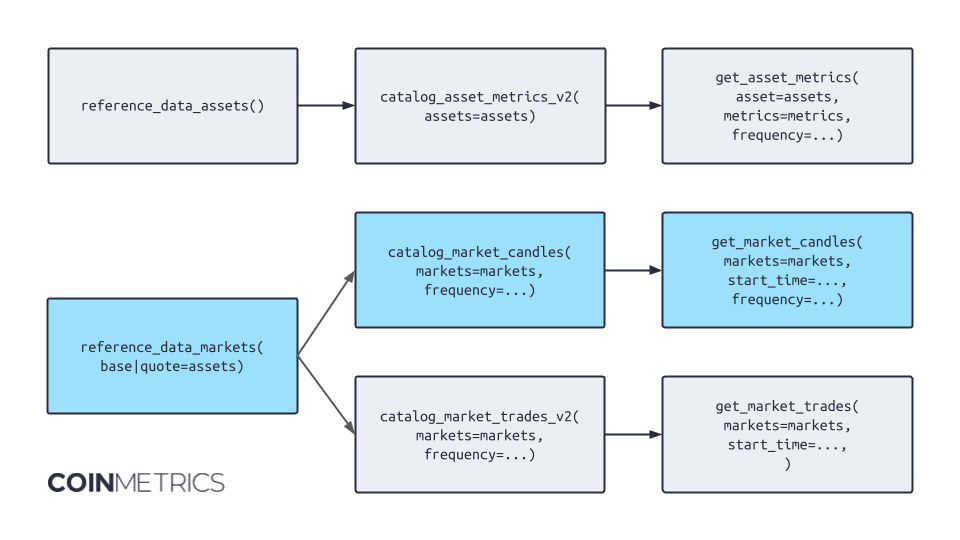

In [4]:
markets = client.reference_data_markets(type='spot').to_dataframe()
markets

,market,exchange,type,base,quote,pair,pool_config_id,contract_address,price_includes_fee,variable_fee,...,order_price_min,order_price_max,order_size_min,base_native,quote_native,order_taker_fee,order_maker_fee,margin_trading_enabled,contract_size,fee
0,aerodrome_slipstream_base-1-aero_base.eth-cbbt...,aerodrome_slipstream_base,spot,aero_base.eth,cbbtc_base.eth,aero_base.eth-cbbtc_base.eth,1,dfe5f275020def30993f042174fc2d335678b626,True,True,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,aerodrome_slipstream_base-1-aero_base.eth-wste...,aerodrome_slipstream_base,spot,aero_base.eth,wsteth.e_base.eth,aero_base.eth-wsteth.e_base.eth,1,565aecf84b5d30a6e79a5cef3f0da0fc4280debc,True,True,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,aerodrome_slipstream_base-1-cbbtc_base.eth-sup...,aerodrome_slipstream_base,spot,cbbtc_base.eth,superoeth_base.eth,cbbtc_base.eth-superoeth_base.eth,1,4d9199269d4f89a367965e90d07d6f4af7750ed0,True,True,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,aerodrome_slipstream_base-1-game_gamebyvirtual...,aerodrome_slipstream_base,spot,game_gamebyvirtuals_base.eth,weth_base.eth,game_gamebyvirtuals_base.eth-weth_base.eth,1,2a36148a416cba81699b555120bd65f4682bdfd2,True,True,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,aerodrome_slipstream_base-1-usdc_base.eth-aero...,aerodrome_slipstream_base,spot,usdc_base.eth,aero_base.eth,usdc_base.eth-aero_base.eth,1,be00ff35af70e8415d0eb605a286d8a45466a4c1,True,True,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48208,zb.com-zb-usdt-spot,zb.com,spot,zb,usdt,zb-usdt,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
48209,zb.com-zkn-usdt-spot,zb.com,spot,zkn,usdt,zkn-usdt,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
48210,zb.com-zrx-btc-spot,zb.com,spot,zrx,btc,zrx-btc,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
48211,zb.com-zrx-qc-spot,zb.com,spot,zrx,qc,zrx-qc,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


In [5]:
trump = markets.loc[
    (markets.base=='trump') &
    markets.quote.isin(['usd', 'usdt', 'usdc', 'fdusd'])
    #(markets.type=='future') &
    #(markets.expiration.isna())
]
trump.columns

Index(['market', 'exchange', 'type', 'base', 'quote', 'pair', 'pool_config_id',
       'contract_address', 'price_includes_fee', 'variable_fee',
       'base_address', 'quote_address', 'experimental', 'symbol', 'status',
       'order_amount_increment', 'order_amount_min', 'order_amount_max',
       'order_price_increment', 'order_price_min', 'order_price_max',
       'order_size_min', 'base_native', 'quote_native', 'order_taker_fee',
       'order_maker_fee', 'margin_trading_enabled', 'contract_size', 'fee'],
      dtype='object')

In [6]:
trump[['market', 'exchange', 'type', 'pair']]

,market,exchange,type,pair
4604,binance-trump-fdusd-spot,binance,spot,trump-fdusd
4606,binance-trump-usdc-spot,binance,spot,trump-usdc
4607,binance-trump-usdt-spot,binance,spot,trump-usdt
5393,binance.us-trump-usd-spot,binance.us,spot,trump-usd
5394,binance.us-trump-usdt-spot,binance.us,spot,trump-usdt
7195,bitstamp-trump-usd-spot,bitstamp,spot,trump-usd
9642,bybit-trump-usdc-spot,bybit,spot,trump-usdc
9643,bybit-trump-usdt-spot,bybit,spot,trump-usdt
10266,cex.io-trump-usd-spot,cex.io,spot,trump-usd
10267,cex.io-trump-usdc-spot,cex.io,spot,trump-usdc


In [7]:
cat = client.catalog_market_candles_v2(
    markets=list(trump.market),
).to_dataframe()
cat = cat.loc[
    (cat.frequency == '1m') &
    (cat.min_time > '2025-01-15')
].reset_index(drop=True)
cat

,market,frequency,min_time,max_time
0,binance-trump-fdusd-spot,1m,2025-02-18 08:00:00+00:00,2025-07-07 06:53:00+00:00
1,binance-trump-usdc-spot,1m,2025-01-19 08:30:00+00:00,2025-07-07 06:53:00+00:00
2,binance-trump-usdt-spot,1m,2025-01-19 08:30:00+00:00,2025-07-07 06:53:00+00:00
3,binance.us-trump-usd-spot,1m,2025-02-25 13:08:00+00:00,2025-07-07 06:53:00+00:00
4,binance.us-trump-usdt-spot,1m,2025-01-23 11:00:00+00:00,2025-07-07 06:53:00+00:00
5,bitstamp-trump-usd-spot,1m,2025-01-22 13:38:00+00:00,2025-07-07 06:53:00+00:00
6,bybit-trump-usdc-spot,1m,2025-01-20 09:00:00+00:00,2025-07-07 06:53:00+00:00
7,bybit-trump-usdt-spot,1m,2025-01-18 10:00:00+00:00,2025-07-07 06:53:00+00:00
8,cex.io-trump-usd-spot,1m,2025-01-19 14:14:00+00:00,2025-01-27 02:05:00+00:00
9,cex.io-trump-usdt-spot,1m,2025-01-19 18:14:00+00:00,2025-02-09 21:24:00+00:00


In [9]:
# Define the time range
start_time = cat.min_time.min()
#end_time = pd.Timestamp('2025-01-14 14:00:00+00:00')

candles = client.get_market_candles(
    markets=list(cat.market),
    frequency='1h',
    start_time=start_time,
    #end_time=end_time,
    page_size=10000
).parallel().to_dataframe()
candles

Exporting to dataframe type: 100%|██████████| 25/25 [00:08<00:00,  2.86it/s]


,market,time,price_open,price_close,price_high,price_low,vwap,volume,candle_usd_volume,candle_trades_count
0,binance-trump-fdusd-spot,2025-02-18 08:00:00+00:00,16.82,16.28,18.3,16.28,16.51369,6522.834,107426.976315,896
1,binance-trump-fdusd-spot,2025-02-18 09:00:00+00:00,16.26,16.49,16.59,16.26,16.527711,3472.111,57322.925583,448
2,binance-trump-fdusd-spot,2025-02-18 10:00:00+00:00,16.6,16.56,16.64,16.52,16.578277,79.105,1309.559353,13
3,binance-trump-fdusd-spot,2025-02-18 11:00:00+00:00,16.54,16.47,16.6,16.43,16.521158,11810.122,194827.781121,797
4,binance-trump-fdusd-spot,2025-02-18 12:00:00+00:00,16.44,16.7,16.78,16.41,16.514337,26939.115,444329.665147,1184
...,...,...,...,...,...,...,...,...,...,...
87198,upbit-trump-usdt-spot,2025-07-07 02:00:00+00:00,8.52,8.52,8.52,8.52,8.52,0.0,0.0,0
87199,upbit-trump-usdt-spot,2025-07-07 03:00:00+00:00,8.52,8.52,8.52,8.52,8.52,0.0,0.0,0
87200,upbit-trump-usdt-spot,2025-07-07 04:00:00+00:00,8.52,8.52,8.52,8.52,8.52,0.0,0.0,0
87201,upbit-trump-usdt-spot,2025-07-07 05:00:00+00:00,8.52,8.52,8.52,8.52,8.52,0.0,0.0,0


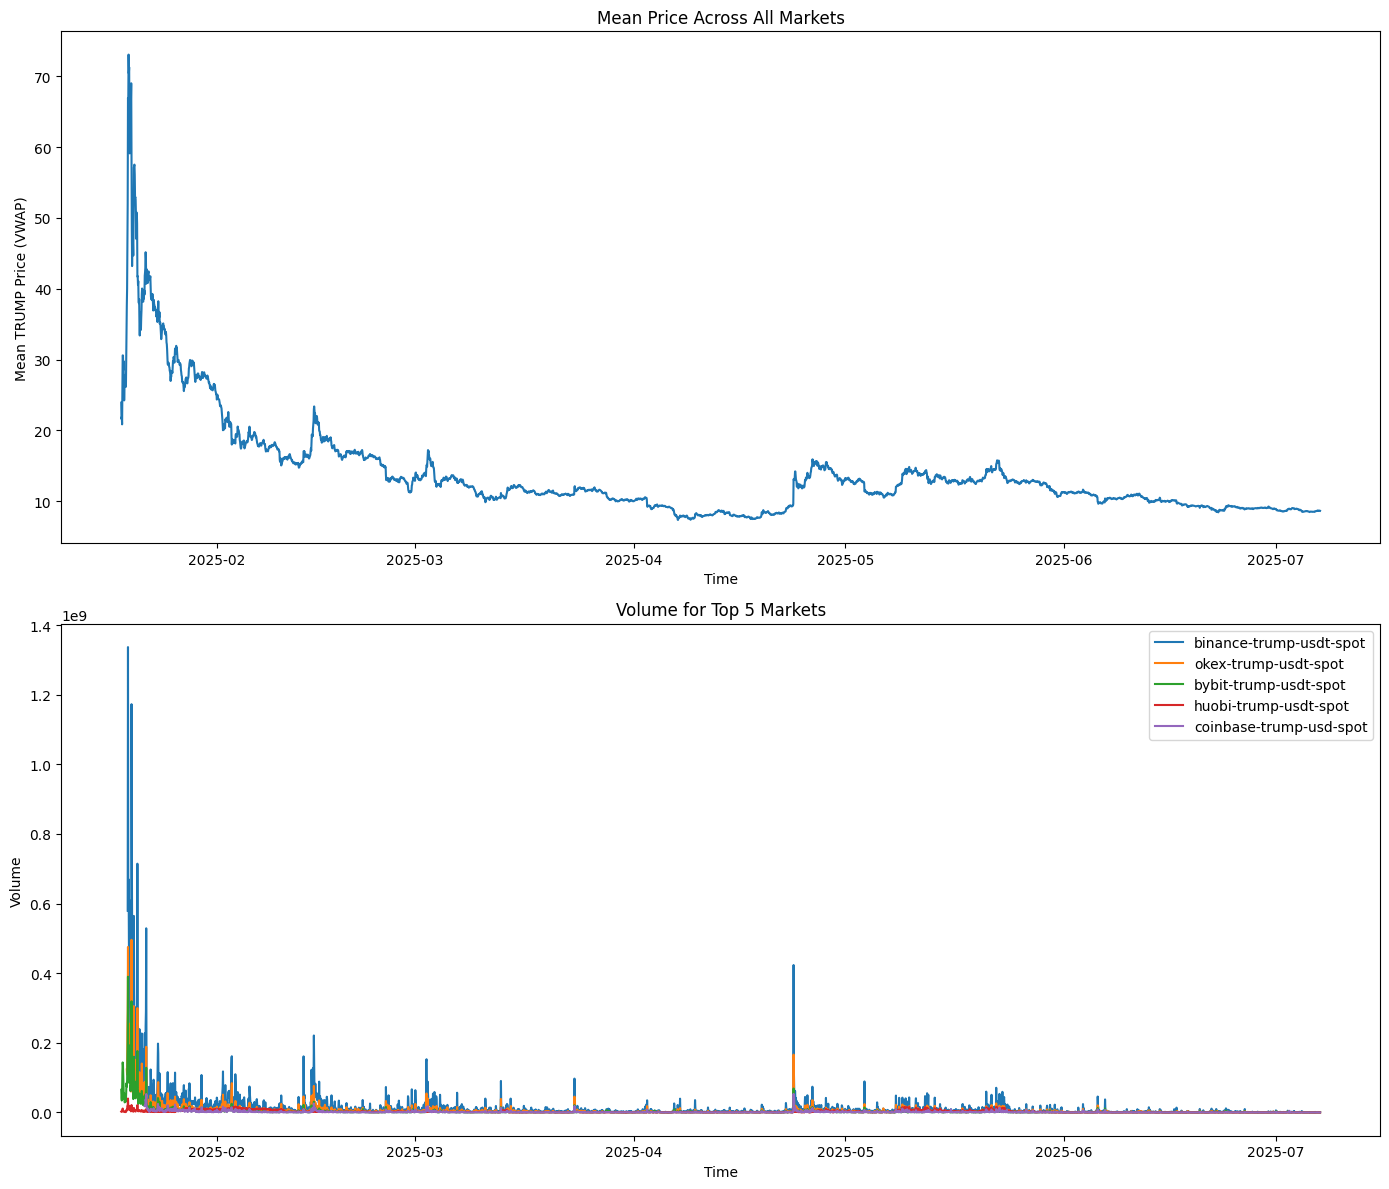

In [10]:
df = candles.copy()
df['time'] = pd.to_datetime(df['time'])
# Calculate the mean price (VWAP) across all markets
mean_price_all_markets = df.groupby('time')['vwap'].mean()

# Calculate the total volume across all markets
total_volume_all_markets = df.groupby('time')['candle_usd_volume'].sum()


# Calculate total volume per market
volume_per_market = df.groupby(['time', 'market'])['candle_usd_volume'].sum().reset_index()

# Get the top 5 markets by total volume
top_5_markets_volume = volume_per_market.groupby('market')['candle_usd_volume'].sum().nlargest(5).index

# Filter for the top 5 markets
volume_per_market_top5 = volume_per_market[volume_per_market['market'].isin(top_5_markets_volume)]


plt.figure(figsize=(14, 12))

# Plot 1: Mean Price across all markets
plt.subplot(2, 1, 1)
plt.plot(mean_price_all_markets.index, mean_price_all_markets.values)
plt.xlabel('Time')
plt.ylabel('Mean TRUMP Price (VWAP)')
plt.title('Mean Price Across All Markets')

# Plot 2: Volume for the top 5 markets
plt.subplot(2, 1, 2)
for market in top_5_markets_volume:
    market_data = volume_per_market_top5[volume_per_market_top5['market'] == market]
    plt.plot(market_data['time'], market_data['candle_usd_volume'], label=market)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume for Top 5 Markets')
plt.legend()

plt.tight_layout()
plt.show()

# Network data

In [11]:
catalog = client.catalog_asset_metrics_v2().to_dataframe().set_index(['asset', 'metric'])
catalog.loc['sol', ['frequency', 'max_time']]

,frequency,max_time
metric,,
AdrActCnt,1d,2025-07-06 00:00:00+00:00
AdrActRecCnt,1d,2025-07-06 00:00:00+00:00
AdrActSentCnt,1d,2025-07-06 00:00:00+00:00
AssetCompletionTime,1d,2025-07-06 00:00:00+00:00
AssetEODCompletionTime,1d,2025-07-06 00:00:00+00:00
...,...,...
volume_reported_option_usdc_margined_notional_usd_1h,1h,2025-07-07 05:00:00+00:00
volume_reported_spot_usd_1d,1d,2025-07-06 00:00:00+00:00
volume_reported_spot_usd_1h,1h,2025-07-07 05:00:00+00:00


In [12]:
nd_trump = client.get_asset_metrics(
    assets="trump_sol", metrics=["TxCnt"], frequency="1d"
).to_dataframe()

In [13]:
nd_trump

,asset,time,TxCnt
0,trump_sol,2025-01-17 00:00:00+00:00,12
1,trump_sol,2025-01-18 00:00:00+00:00,3554415
2,trump_sol,2025-01-19 00:00:00+00:00,3081601
3,trump_sol,2025-01-20 00:00:00+00:00,2354209
4,trump_sol,2025-01-21 00:00:00+00:00,1456768
...,...,...,...
166,trump_sol,2025-07-02 00:00:00+00:00,49649
167,trump_sol,2025-07-03 00:00:00+00:00,55531
168,trump_sol,2025-07-04 00:00:00+00:00,69543
169,trump_sol,2025-07-05 00:00:00+00:00,58704


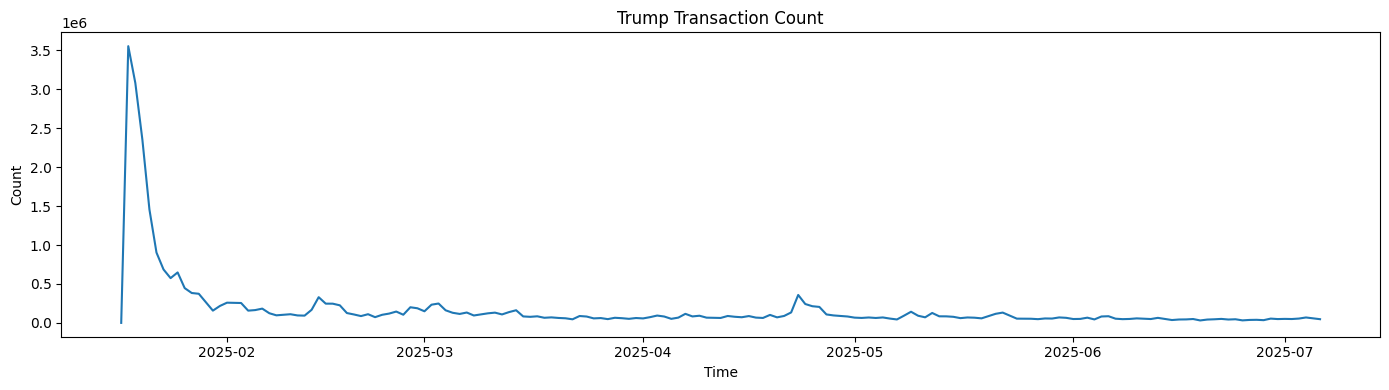

In [14]:
df = nd_trump.copy()
df['time'] = pd.to_datetime(df['time'])

plt.figure(figsize=(14, 4))

plt.plot(df.time, df.TxCnt)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Trump Transaction Count')

plt.tight_layout()
plt.show()

In [15]:
staking_sol = client.get_asset_metrics(
    assets="sol",
    metrics=["StakingAPRNominal", "StakingAPYNominal", "StakingAPYReal", "SplyStkedNtv", "SplyActStkedNtv", "SplyDelegatorStkedNtv", "StakerCnt", "StakerAddCnt1d", "StakerRemCnt1d"],
    frequency="1d"
).to_dataframe()


In [16]:
staking_sol

,asset,time,SplyActStkedNtv,SplyDelegatorStkedNtv,SplyStkedNtv,StakerAddCnt1d,StakerCnt,StakerRemCnt1d,StakingAPRNominal,StakingAPYNominal,StakingAPYReal
0,sol,2022-01-01 00:00:00+00:00,275011904.967965,393888746.315122,395336415.556402,0,435283,0,<NA>,<NA>,<NA>
1,sol,2022-01-02 00:00:00+00:00,275137306.158617,394892620.380302,396038677.696802,24664,391055,68892,6.800479,7.035183,-8.414785
2,sol,2022-01-03 00:00:00+00:00,275137306.158617,394892620.380302,396038677.696802,0,391055,0,6.563099,6.78136,6.819363
3,sol,2022-01-04 00:00:00+00:00,275137306.158617,394892620.380302,396038677.696802,0,391055,0,6.636389,6.859669,6.902249
4,sol,2022-01-05 00:00:00+00:00,274495251.173876,393773121.285817,394969262.506879,38526,417388,12193,6.378347,6.584424,-8.85708
...,...,...,...,...,...,...,...,...,...,...,...
1278,sol,2025-07-02 00:00:00+00:00,296101622.435847,390635710.35994,391001036.303613,0,1047912,0,7.490882,7.776944,7.829861
1279,sol,2025-07-03 00:00:00+00:00,303764286.071067,398283593.752658,398669062.762313,30400,1019285,59027,7.197451,7.461283,-1.747446
1280,sol,2025-07-04 00:00:00+00:00,303764286.071067,398283593.752658,398669062.762313,0,1019285,0,7.305604,7.577531,7.628519
1281,sol,2025-07-05 00:00:00+00:00,306472599.301388,400519097.91601,400925382.032478,39939,1034370,24854,7.004235,7.253923,-1.947724


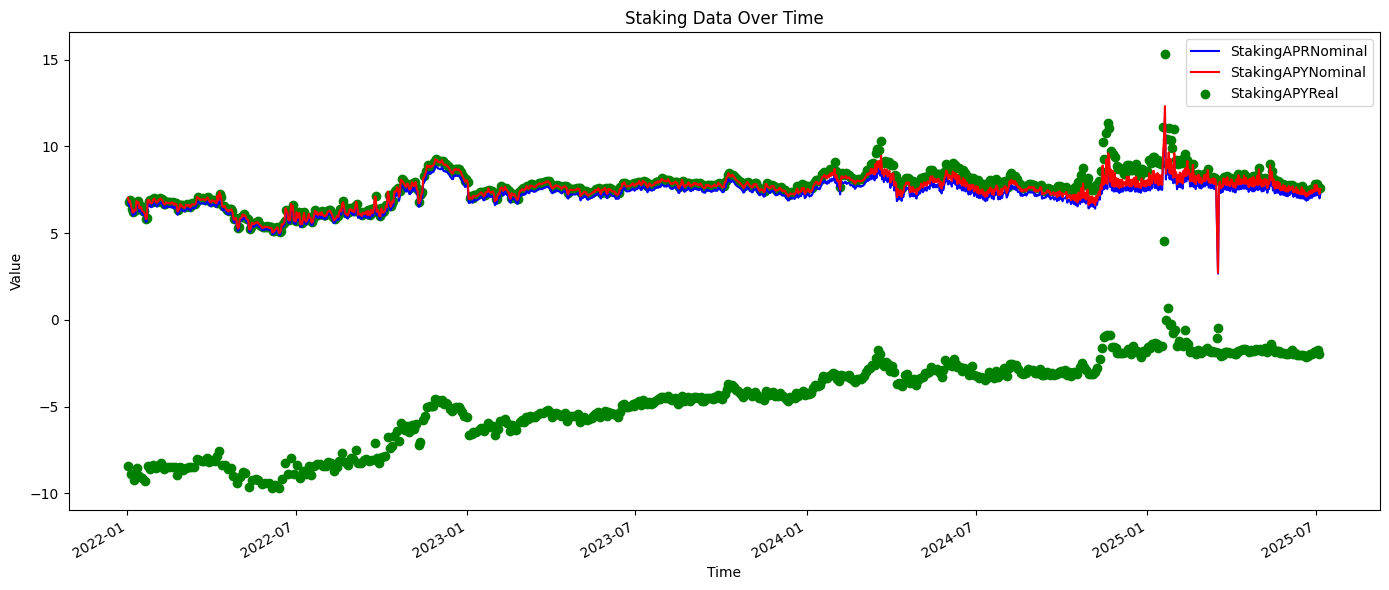

In [17]:
# prompt: Using dataframe staking_sol: Plot a timeseries graph of the data with StakingAPRNominal and StakingAPYNominal as lines and StakingAPYReal as a scatter. Use Matplotlib

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot StakingAPRNominal and StakingAPYNominal as lines
ax.plot(staking_sol['time'], staking_sol['StakingAPRNominal'], label='StakingAPRNominal', color='blue')
ax.plot(staking_sol['time'], staking_sol['StakingAPYNominal'], label='StakingAPYNominal', color='red')

# Plot StakingAPYReal as a scatter
ax.scatter(staking_sol['time'], staking_sol['StakingAPYReal'], label='StakingAPYReal', color='green', marker='o')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Staking Data Over Time')

# Add a legend
ax.legend()

# Format the x-axis to show dates nicely
fig.autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


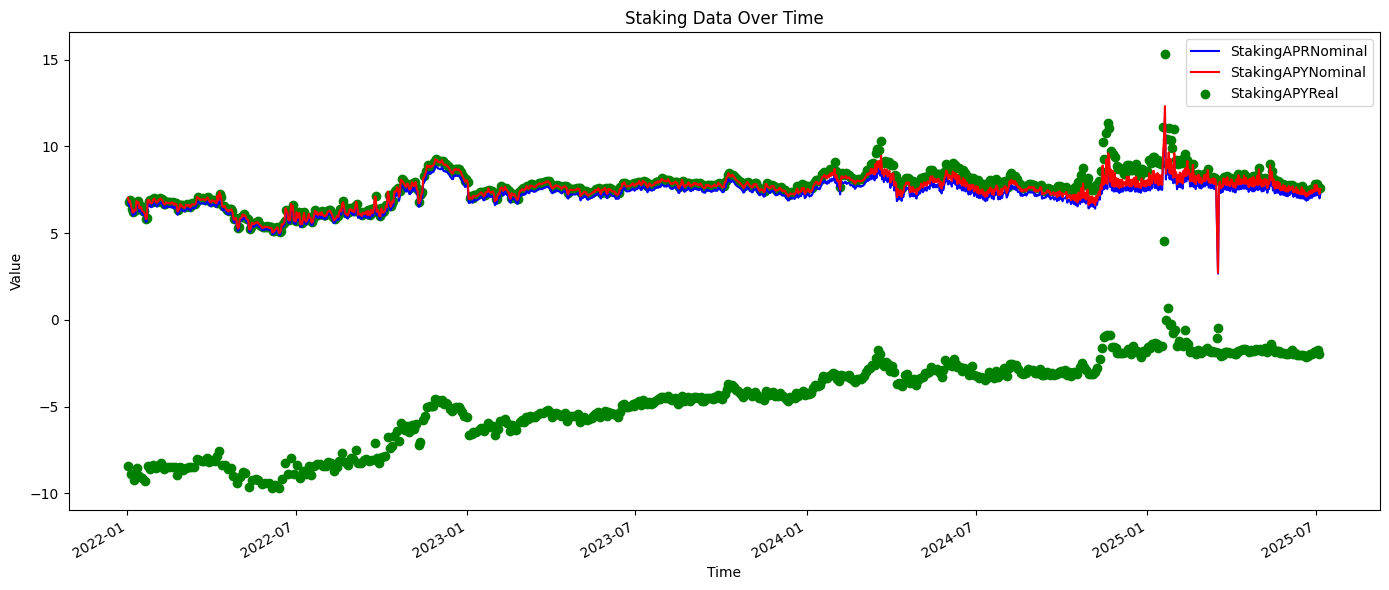

In [18]:
# prompt: Using dataframe staking_sol: Plot a timeseries graph of the data with StakingAPRNominal and StakingAPYNominal as lines and StakingAPYReal as a scatter. Use Matplotlib

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot StakingAPRNominal and StakingAPYNominal as lines
ax.plot(staking_sol['time'], staking_sol['StakingAPRNominal'], label='StakingAPRNominal', color='blue')
ax.plot(staking_sol['time'], staking_sol['StakingAPYNominal'], label='StakingAPYNominal', color='red')

# Plot StakingAPYReal as a scatter
ax.scatter(staking_sol['time'], staking_sol['StakingAPYReal'], label='StakingAPYReal', color='green', marker='o')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Staking Data Over Time')

# Add a legend
ax.legend()

# Format the x-axis to show dates nicely
fig.autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


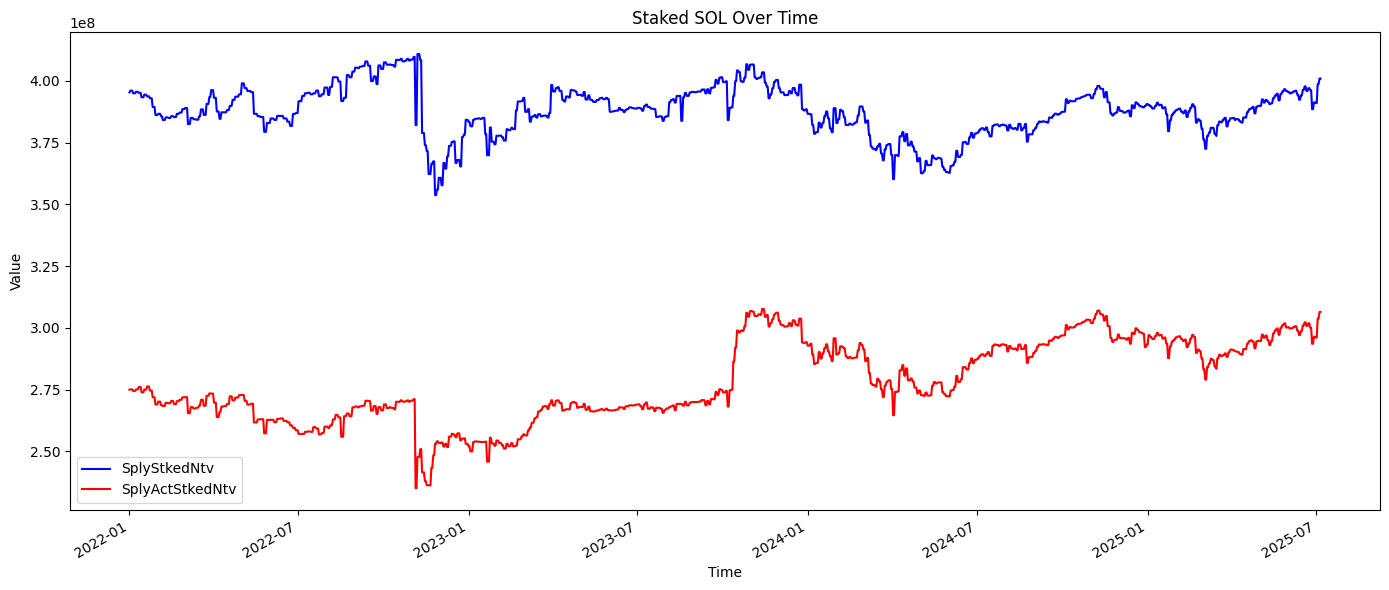

In [19]:
# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot StakingAPRNominal and StakingAPYNominal as lines
ax.plot(staking_sol['time'], staking_sol['SplyStkedNtv'], label='SplyStkedNtv', color='blue')
ax.plot(staking_sol['time'], staking_sol['SplyActStkedNtv'], label='SplyActStkedNtv', color='red')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Staked SOL Over Time')

# Add a legend
ax.legend()

# Format the x-axis to show dates nicely
fig.autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

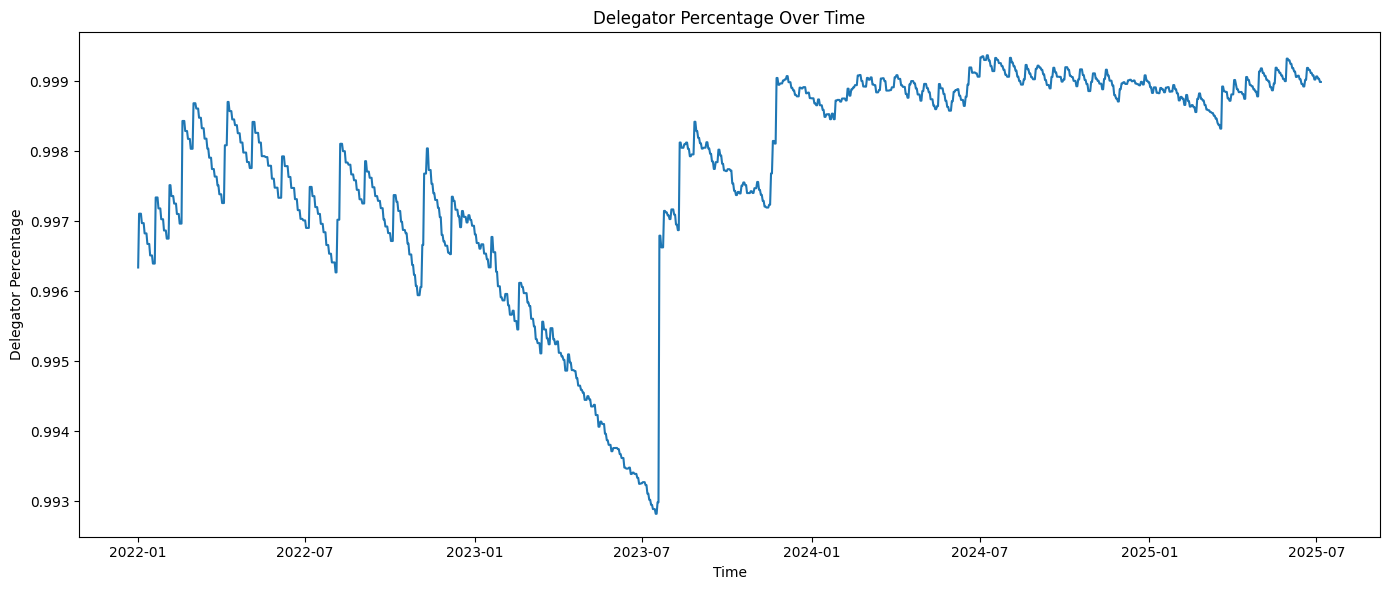

In [20]:
# Calculate the DelegatorPercentage
staking_sol['DelegatorPercentage'] = staking_sol['SplyDelegatorStkedNtv'] / staking_sol['SplyStkedNtv']

# Plot the DelegatorPercentage over time
plt.figure(figsize=(14, 6))
plt.plot(staking_sol['time'], staking_sol['DelegatorPercentage'])
plt.xlabel('Time')
plt.ylabel('Delegator Percentage')
plt.title('Delegator Percentage Over Time')

# Format the x-axis to show dates nicely
fig.autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


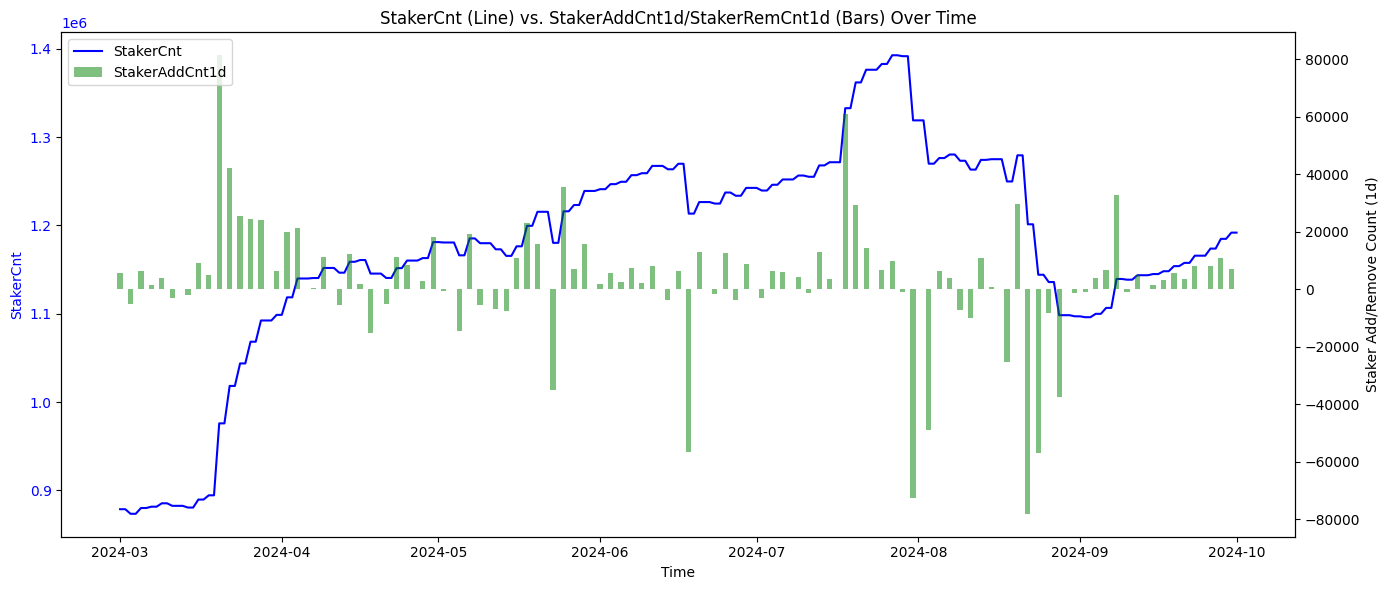

In [21]:
start_date = "2024-03-01 00:00:00+00:00"
end_date = "2024-10-01 00:00:00+00:00"
df = staking_sol[(staking_sol['time'] >= start_date) & (staking_sol['time'] <= end_date)].copy()

# Create the figure and the first axis for the line plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot StakerCnt as a line graph
ax1.plot(df['time'], df['StakerCnt'], color='blue', label='StakerCnt')
ax1.set_xlabel('Time')
ax1.set_ylabel('StakerCnt', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis for the bar plot, sharing the x-axis with the first
ax2 = ax1.twinx()

# Plot StakerAddCnt1d and StakerRemCnt1d as bars
ax2.bar(df['time'], df['StakerAddCnt1d'] - df['StakerRemCnt1d'], color='green', alpha=0.5, label='StakerAddCnt1d', width=1)
ax2.set_ylabel('Staker Add/Remove Count (1d)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Add a title to the plot
plt.title('StakerCnt (Line) vs. StakerAddCnt1d/StakerRemCnt1d (Bars) Over Time')

# Display the plot
plt.tight_layout()
plt.show()


In [22]:
df

,asset,time,SplyActStkedNtv,SplyDelegatorStkedNtv,SplyStkedNtv,StakerAddCnt1d,StakerCnt,StakerRemCnt1d,StakingAPRNominal,StakingAPYNominal,StakingAPYReal,DelegatorPercentage
790,sol,2024-03-01 00:00:00+00:00,291307902.914316,387196439.17045,387566756.647422,22319,878676,16611,7.710436,8.013655,-3.37292,0.999045
791,sol,2024-03-02 00:00:00+00:00,291307902.914316,387196439.17045,387566756.647422,0,878676,0,7.764985,8.072566,8.171155,0.999045
792,sol,2024-03-03 00:00:00+00:00,286569789.762459,382710772.515169,383086545.867519,20694,873488,25882,7.803155,8.113818,-3.244584,0.999019
793,sol,2024-03-04 00:00:00+00:00,286569789.762459,382710772.515169,383086545.867519,0,873488,0,7.920867,8.24111,8.371788,0.999019
794,sol,2024-03-05 00:00:00+00:00,287847505.784857,383590861.812954,383954897.19249,21973,880033,15428,7.967128,8.291173,-3.002191,0.999052
...,...,...,...,...,...,...,...,...,...,...,...,...
1000,sol,2024-09-27 00:00:00+00:00,295938920.338856,385901897.460681,386265202.533155,0,1173759,0,7.108688,7.365755,7.709994,0.999059
1001,sol,2024-09-28 00:00:00+00:00,296482838.923106,386326008.100871,386715971.589271,35975,1184772,24962,6.898935,7.140906,-3.02096,0.998992
1002,sol,2024-09-29 00:00:00+00:00,296482838.923106,386326008.100871,386715971.589271,0,1184772,0,7.160148,7.421047,7.744903,0.998992
1003,sol,2024-09-30 00:00:00+00:00,296939951.458268,386977337.866899,387356715.484046,28078,1191827,21023,6.969178,7.216179,-2.934325,0.999021


# MEV

In [23]:
catalog = client.catalog_asset_metrics_v2(metrics = "MevTfrValUSD").to_dataframe()
catalog

,asset,metric,frequency,min_time,max_time,min_height,max_height,min_hash,max_hash,community
0,bnsol_sol,MevTfrValUSD,1d,2025-03-28 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
1,boden_sol,MevTfrValUSD,1d,2024-06-17 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
2,bome_sol,MevTfrValUSD,1d,2024-03-28 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
3,bonk_sol,MevTfrValUSD,1d,2023-10-19 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
4,cbbtc_sol,MevTfrValUSD,1d,2025-03-28 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
5,eurc_sol,MevTfrValUSD,1d,2023-11-21 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
6,hnt_sol,MevTfrValUSD,1d,2023-10-19 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
7,jitosol_sol,MevTfrValUSD,1d,2025-05-14 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
8,jto_sol,MevTfrValUSD,1d,2023-12-07 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None
9,jup_sol,MevTfrValUSD,1d,2024-01-25 00:00:00+00:00,2025-07-06 00:00:00+00:00,None,None,None,None,None


In [24]:
nd_mev = client.get_asset_metrics(
    assets=list(catalog.asset), metrics=["MevTfrValUSD"], frequency="1d"
).to_dataframe()

In [25]:
nd_mev

,asset,time,MevTfrValUSD
0,bnsol_sol,2025-03-28 00:00:00+00:00,48401.931224
1,bnsol_sol,2025-03-29 00:00:00+00:00,2038.401199
2,bnsol_sol,2025-03-30 00:00:00+00:00,6891.646146
3,bnsol_sol,2025-03-31 00:00:00+00:00,12559.311016
4,bnsol_sol,2025-04-01 00:00:00+00:00,36885.873271
...,...,...,...
15926,wsol_sol,2025-07-02 00:00:00+00:00,780873061.904284
15927,wsol_sol,2025-07-03 00:00:00+00:00,853335827.606605
15928,wsol_sol,2025-07-04 00:00:00+00:00,743765002.505683
15929,wsol_sol,2025-07-05 00:00:00+00:00,554037873.948742


In [26]:
# prompt: Using dataframe nd_mev: I would like to group assets. Keep the top 5 based on most recent `MevTfrValUSD` separate and sum all other `MevTfrValUSD` up by `asset` and `time`. Call this new group `others`.

# Sort the dataframe by time in descending order to get the most recent values.
nd_mev_sorted = nd_mev.sort_values('time', ascending=False)

# Get the top 5 assets based on the most recent MevTfrValUSD.
top_5_assets = nd_mev_sorted.groupby('asset')['MevTfrValUSD'].first().nlargest(5).index

# Create a boolean mask to identify rows belonging to the top 5 assets.
top_5_mask = nd_mev_sorted['asset'].isin(top_5_assets)

# Create dataframes for the top 5 assets and the rest (others).
top_5_df = nd_mev_sorted[top_5_mask]
others_df = nd_mev_sorted[~top_5_mask]

# Group the 'others' dataframe by 'asset' and 'time' and sum their 'MevTfrValUSD'.
others_grouped = others_df.groupby(['time'])['MevTfrValUSD'].sum().reset_index()
others_grouped['asset'] = 'others'  # Rename the 'asset' column to 'others'

# Concatenate the top 5 dataframe and the grouped 'others' dataframe.
combined_df = pd.concat([top_5_df, others_grouped])

combined_df


,asset,time,MevTfrValUSD
15930,wsol_sol,2025-07-06 00:00:00+00:00,683123059.287049
11868,trump_sol,2025-07-06 00:00:00+00:00,19867485.710419
13522,usdt_sol,2025-07-06 00:00:00+00:00,47617314.216152
12495,usdc_sol,2025-07-06 00:00:00+00:00,346782290.807819
11597,sol,2025-07-06 00:00:00+00:00,1139883919.559491
...,...,...,...
622,others,2025-07-02 00:00:00+00:00,64309758.599587
623,others,2025-07-03 00:00:00+00:00,58725330.804492
624,others,2025-07-04 00:00:00+00:00,38142468.362662
625,others,2025-07-05 00:00:00+00:00,26701579.417327


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'time' column to datetime objects if it's not already
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Filter data for the specified minimum x-axis value
filtered_df = combined_df[combined_df['time'] >= '2025-01-01']

# Group data by 'time' and 'asset' and sum 'MevTfrValUSD'
grouped_df = filtered_df.groupby(['time', 'asset'])['MevTfrValUSD'].sum().unstack()
grouped_df


asset,others,sol,trump_sol,usdc_sol,usdt_sol,wsol_sol
time,,,,,,
2025-01-01 00:00:00+00:00,344993612.257869,2009175341.321872,<NA>,2015079142.843242,148941675.801262,1756816565.402029
2025-01-02 00:00:00+00:00,733985511.721828,3820485740.290207,<NA>,4003416126.752276,388903247.780852,3236390556.786469
2025-01-03 00:00:00+00:00,640967524.921805,2514384305.144026,<NA>,3039466207.050262,323142870.286158,2190046012.048091
2025-01-04 00:00:00+00:00,426661597.595315,1678181978.533109,<NA>,2079607806.960718,207029556.333469,1374047143.805905
2025-01-05 00:00:00+00:00,467708330.302397,1935664664.642168,<NA>,2231319319.3353,226883296.212582,1623758924.688819
...,...,...,...,...,...,...
2025-07-02 00:00:00+00:00,64309758.599587,1208297363.71184,32649356.09349,401320742.01392,56260171.20002,780873061.904284
2025-07-03 00:00:00+00:00,58725330.804492,1315133880.458553,42795563.797757,465984806.430398,62173881.196424,853335827.606605
2025-07-04 00:00:00+00:00,38142468.362662,1134799217.543752,38735154.834801,405863336.543924,48514016.927215,743765002.505683


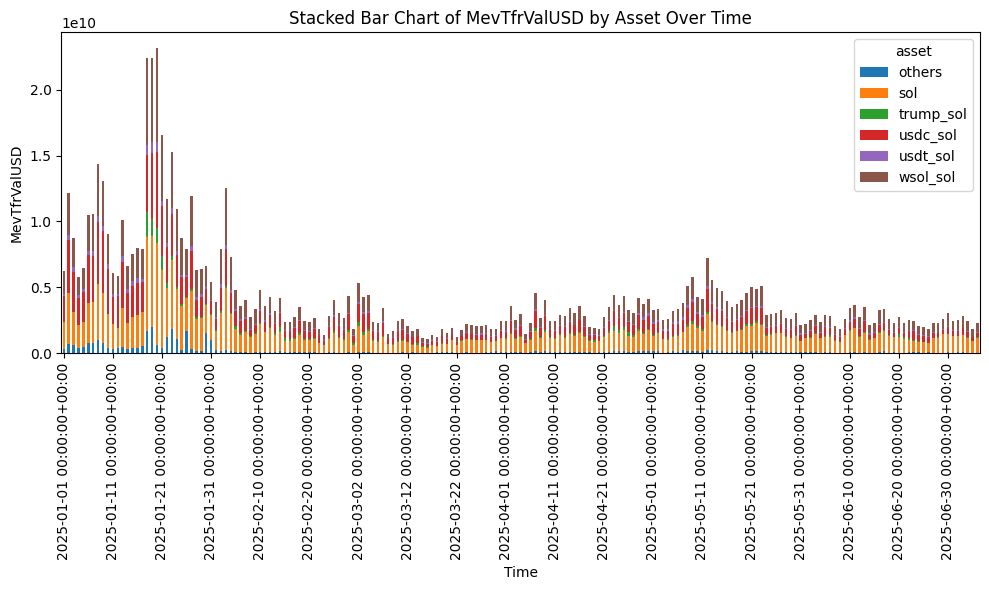

In [28]:
# Create the stacked bar chart
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set x-axis label and tick rotation
ax.set_xlabel("Time")
ticks, labels = plt.xticks()

# Create new ticks and labels keeping every 10th original tick
new_ticks = ticks[::10]
new_labels = [labels[i] for i in range(len(ticks)) if ticks[i] in new_ticks]

plt.xticks(new_ticks, new_labels)

# Set y-axis label
ax.set_ylabel("MevTfrValUSD")

# Set title
ax.set_title("Stacked Bar Chart of MevTfrValUSD by Asset Over Time")



# Show the plot
plt.tight_layout()
plt.show()


In [29]:
nd_fee = client.get_asset_metrics(
    assets=["sol"], metrics=["FeeMevTotUSD"], frequency="1d"
).to_dataframe()

In [30]:
nd_fee

,asset,time,FeeMevTotUSD
0,sol,2023-10-19 00:00:00+00:00,0.0
1,sol,2023-10-20 00:00:00+00:00,828.805442
2,sol,2023-10-21 00:00:00+00:00,1280.475766
3,sol,2023-10-22 00:00:00+00:00,1174.790171
4,sol,2023-10-23 00:00:00+00:00,3414.68993
...,...,...,...
622,sol,2025-07-02 00:00:00+00:00,1349905.046509
623,sol,2025-07-03 00:00:00+00:00,1361063.431977
624,sol,2025-07-04 00:00:00+00:00,1005360.128086
625,sol,2025-07-05 00:00:00+00:00,1089428.610096


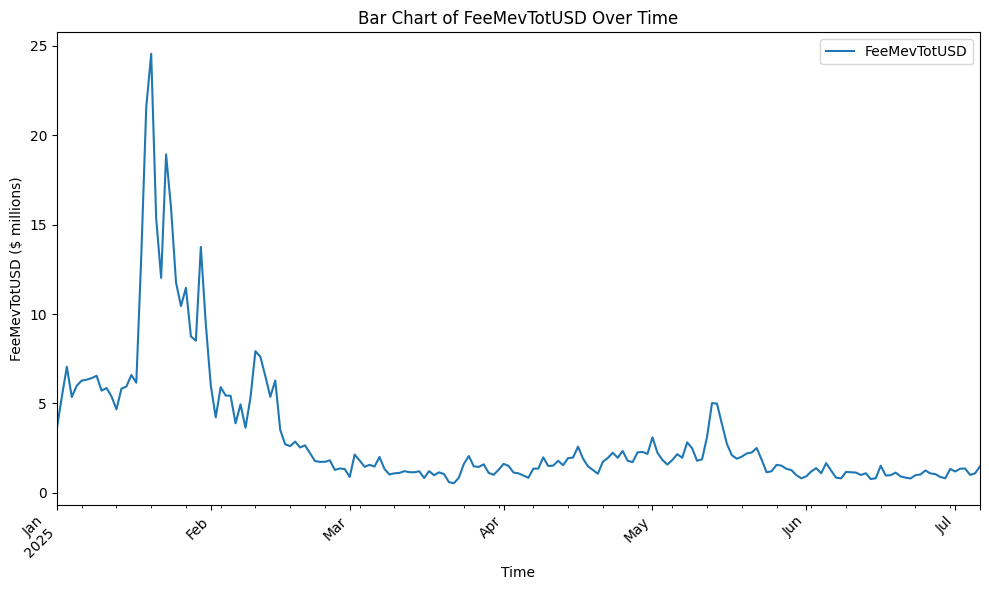

In [31]:
# Convert 'time' column to datetime objects if it's not already
nd_fee['time'] = pd.to_datetime(nd_fee['time'])
nd_fee['FeeMevTotUSD'] = nd_fee['FeeMevTotUSD'] / 1e6

# Filter data for the specified minimum x-axis value
filtered_df = nd_fee[nd_fee['time'] >= '2025-01-01'].set_index('time')

# Create the stacked bar chart
ax = filtered_df.plot(kind='line', figsize=(10, 6))

# Set x-axis label and tick rotation
ax.set_xlabel("Time")
plt.xticks(rotation=45, ha='right')

# Set y-axis label
ax.set_ylabel("FeeMevTotUSD ($ millions)")

# Set title
ax.set_title("Bar Chart of FeeMevTotUSD Over Time")

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
nd_fee_prio = client.get_asset_metrics(
    assets=['sol'], metrics=["FeePrioTotMevNtv","FeePrioMeanMevNtv","FeePrioMedMevNtv","FeePrioTotNtv","FeePrioMeanNtv","FeePrioMedNtv"], frequency="1d"
).to_dataframe()

nd_fee_prio["FeePrioTotRatio"] = nd_fee_prio["FeePrioTotMevNtv"]/nd_fee_prio["FeePrioTotNtv"]
nd_fee_prio["FeePrioMeanRatio"] = nd_fee_prio["FeePrioMeanMevNtv"]/nd_fee_prio["FeePrioMeanNtv"]
nd_fee_prio["FeePrioMedRatio"] = nd_fee_prio["FeePrioMedMevNtv"]/nd_fee_prio["FeePrioMedNtv"]
nd_fee_prio['time'] = pd.to_datetime(nd_fee_prio['time'])
nd_fee_prio = nd_fee_prio[nd_fee_prio['time'] >= '2024-01-01']

In [33]:
nd_fee_prio

,asset,time,FeePrioMeanMevNtv,FeePrioMeanNtv,FeePrioMedMevNtv,FeePrioMedNtv,FeePrioTotMevNtv,FeePrioTotNtv,FeePrioTotRatio,FeePrioMeanRatio,FeePrioMedRatio
1363,sol,2024-01-01 00:00:00+00:00,0.0,0.000059,0.0,0.0,0.01593,3275.875992,0.000005,0.000422,0.0
1364,sol,2024-01-02 00:00:00+00:00,0.0,0.000069,0.0,0.000001,0.03328,4112.147353,0.000008,0.000713,0.0
1365,sol,2024-01-03 00:00:00+00:00,0.0,0.000056,0.0,0.000001,0.028166,3235.690191,0.000009,0.000762,0.0
1366,sol,2024-01-04 00:00:00+00:00,0.0,0.000049,0.0,0.000001,0.021838,2860.420821,0.000008,0.000659,0.0
1367,sol,2024-01-05 00:00:00+00:00,0.0,0.000056,0.0,0.000001,0.02246,3354.486514,0.000007,0.000617,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1911,sol,2025-07-02 00:00:00+00:00,0.000008,0.000058,0.0,0.0,190.847301,6510.05382,0.029316,0.139256,0.0
1912,sol,2025-07-03 00:00:00+00:00,0.000008,0.000058,0.0,0.0,172.105064,6454.459563,0.026665,0.130394,0.0
1913,sol,2025-07-04 00:00:00+00:00,0.000008,0.00005,0.0,0.0,148.891078,4938.681638,0.030148,0.151408,0.0
1914,sol,2025-07-05 00:00:00+00:00,0.000009,0.00006,0.0,0.000001,169.970187,6207.800606,0.02738,0.15271,0.0


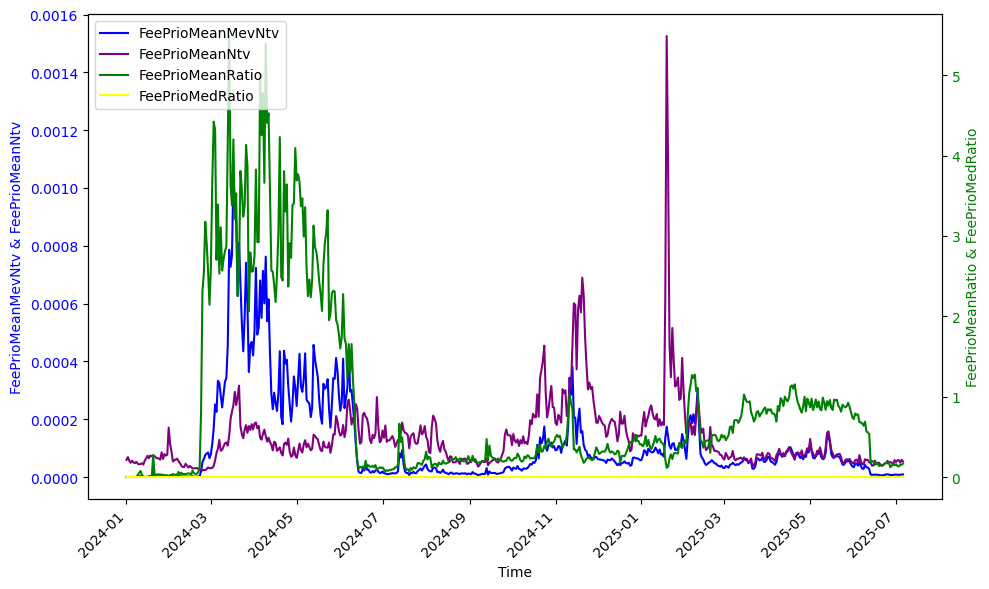

In [34]:
# prompt: Using dataframe nd_fee_prio: Using matplotlib, generate a line graph of this data, plotting `time` on the x-axis and `FeePrioTotMevNtv` and `FeePrioTotNtv` on the left y-axis. Plot `FeePrioMeanRatio` and `FeePrioMedRatio` on the right y-axis.

import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot FeePrioTotMevNtv and FeePrioTotNtv on the left y-axis
ax1.plot(nd_fee_prio['time'], nd_fee_prio['FeePrioMeanMevNtv'], label='FeePrioMeanMevNtv', color='blue')
ax1.plot(nd_fee_prio['time'], nd_fee_prio['FeePrioMeanNtv'], label='FeePrioMeanNtv', color='purple')
ax1.set_xlabel('Time')
ax1.set_ylabel('FeePrioMeanMevNtv & FeePrioMeanNtv', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot FeePrioMeanRatio and FeePrioMedRatio on the right y-axis
ax2.plot(nd_fee_prio['time'], nd_fee_prio['FeePrioMeanRatio'], label='FeePrioMeanRatio', color='green')
ax2.plot(nd_fee_prio['time'], nd_fee_prio['FeePrioMedRatio'], label='FeePrioMedRatio', color='yellow')
ax2.set_ylabel('FeePrioMeanRatio & FeePrioMedRatio', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [35]:
df = client.get_asset_metrics(
    assets=['sol', 'usdc_sol','usdt_sol'], metrics=['FeeMevTotNtv', 'MevAdrActCnt', 'MevBlkCnt', 'FeeMevMeanNtv',
       'FeeMevMedNtv', 'MevTfrValAbUSD100MCnt',
       'MevTfrValAbUSD100MNtv', 'MevTfrValAbUSD100kCnt',
       'MevTfrValAbUSD100kNtv', 'MevTfrValAbUSD10MCnt', 'MevTfrValAbUSD10MNtv',
       'MevTfrValAbUSD1MCnt', 'MevTfrValAbUSD1MNtv', 'MevTfrValBelUSD100Cnt',
       'MevTfrValBelUSD100Ntv', 'MevTfrValBelUSD10kCnt',
       'MevTfrValBelUSD10kNtv', 'MevTfrValBelUSD1kCnt', 'MevTfrValBelUSD1kNtv',
       'MevTfrValBelUSD500Cnt', 'MevTfrValBelUSD500Ntv', 'MevTfrValNtv',
       'MevTxCnt', 'MevWalActCnt'], frequency="1d"
).to_dataframe()

In [36]:
df_sol = df[df['asset'] == 'sol']

# Reset the index to make 'time' a column again
df_sol = df_sol.reset_index()
df_sol['time'] = pd.to_datetime(df_sol['time'])

# Define the start and end dates for filtering
start_date = pd.to_datetime("2023-10-20").tz_localize('UTC')
end_date = pd.to_datetime("2024-02-28").tz_localize('UTC')

# Filter the DataFrame to include only rows within the specified date range
df_sol = df_sol[(df_sol['time'] >= start_date) & (df_sol['time'] <= end_date)]

# Display the resulting wide DataFrame
print(df_sol.columns)
df_sol


Index(['index', 'asset', 'time', 'FeeMevMeanNtv', 'FeeMevMedNtv',
       'FeeMevTotNtv', 'MevAdrActCnt', 'MevBlkCnt', 'MevTfrValAbUSD100MCnt',
       'MevTfrValAbUSD100MNtv', 'MevTfrValAbUSD100kCnt',
       'MevTfrValAbUSD100kNtv', 'MevTfrValAbUSD10MCnt', 'MevTfrValAbUSD10MNtv',
       'MevTfrValAbUSD1MCnt', 'MevTfrValAbUSD1MNtv', 'MevTfrValBelUSD100Cnt',
       'MevTfrValBelUSD100Ntv', 'MevTfrValBelUSD10kCnt',
       'MevTfrValBelUSD10kNtv', 'MevTfrValBelUSD1kCnt', 'MevTfrValBelUSD1kNtv',
       'MevTfrValBelUSD500Cnt', 'MevTfrValBelUSD500Ntv', 'MevTfrValNtv',
       'MevTxCnt', 'MevWalActCnt'],
      dtype='object')


,index,asset,time,FeeMevMeanNtv,FeeMevMedNtv,FeeMevTotNtv,MevAdrActCnt,MevBlkCnt,MevTfrValAbUSD100MCnt,MevTfrValAbUSD100MNtv,...,MevTfrValBelUSD100Ntv,MevTfrValBelUSD10kCnt,MevTfrValBelUSD10kNtv,MevTfrValBelUSD1kCnt,MevTfrValBelUSD1kNtv,MevTfrValBelUSD500Cnt,MevTfrValBelUSD500Ntv,MevTfrValNtv,MevTxCnt,MevWalActCnt
1,1,sol,2023-10-20 00:00:00+00:00,0.000083,0.000005,30.557873,7587,69088,0,0,...,1494.713611,367839,12047.722834,367762,5752.54193,367702,4206.051819,15174.279696,367844,27
2,2,sol,2023-10-21 00:00:00+00:00,0.000116,0.000005,43.585475,8540,70389,0,0,...,1362.31658,374302,19090.741862,374158,5808.170746,374086,4119.6372,20968.293835,374307,27
3,3,sol,2023-10-22 00:00:00+00:00,0.000105,0.000005,40.548231,7634,73553,0,0,...,1014.809767,385542,7318.832076,385502,3536.76122,385462,2610.975354,8555.363624,385543,25
4,4,sol,2023-10-23 00:00:00+00:00,0.000281,0.000005,107.171997,9324,68366,0,0,...,1965.104185,380721,25640.428719,380536,10186.323113,380374,6565.866641,29452.525142,380728,25
5,5,sol,2023-10-24 00:00:00+00:00,0.000291,0.000005,113.287043,9456,67022,0,0,...,2605.857964,388836,42336.712507,388546,10209.885838,388425,7394.182053,43672.981138,388839,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,sol,2024-02-24 00:00:00+00:00,0.001058,0.000005,1496.920476,194548,121978,0,0,...,19045.579732,1414809,395729.257921,1404261,154190.536169,1395447,96561.089797,475598.117999,1415318,16773
129,129,sol,2024-02-25 00:00:00+00:00,0.002062,0.000005,2446.114326,193190,125486,0,0,...,21687.116452,1185655,408254.261008,1176200,168282.72895,1167137,108653.452857,536826.45734,1186321,16981
130,130,sol,2024-02-26 00:00:00+00:00,0.002642,0.000005,3035.477419,209180,120147,0,0,...,19462.810077,1144146,626233.634302,1126530,188428.116402,1114671,113080.613894,1319250.414535,1148998,18317
131,131,sol,2024-02-27 00:00:00+00:00,0.00237,0.000005,2928.729153,241366,121719,0,0,...,25423.670534,1227496,831004.174077,1203017,288468.966525,1184376,168708.991761,2073087.198873,1235848,20849


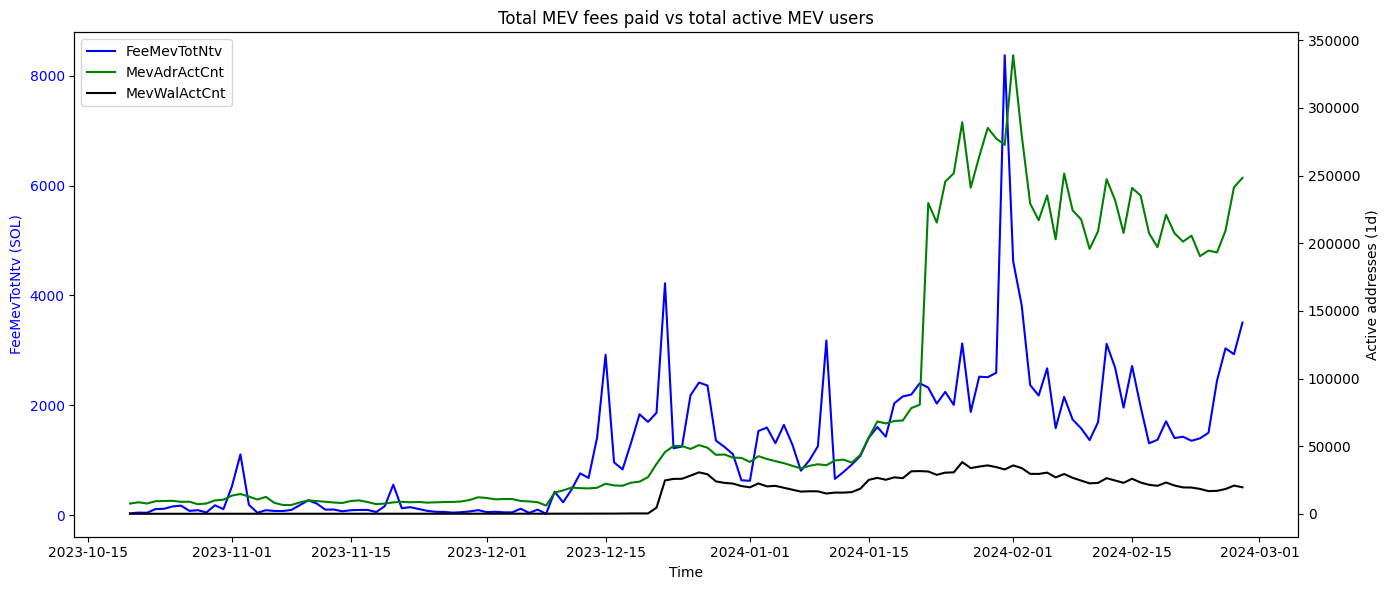

In [37]:
#Create the figure and the first axis for the line plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot FeeMevTotNtv as a line graph
ax1.plot(df_sol['time'], df_sol['FeeMevTotNtv'], color='blue', label='FeeMevTotNtv')
ax1.set_xlabel('Time')
ax1.set_ylabel('FeeMevTotNtv (SOL)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis for the bar plot, sharing the x-axis with the first
ax2 = ax1.twinx()

# Plot MevAdrActCnt and MevWalActCnt as bars
ax2.plot(df_sol['time'], df_sol['MevAdrActCnt'], color='green', label='MevAdrActCnt')
ax2.plot(df_sol['time'], df_sol['MevWalActCnt'], color='black', label='MevWalActCnt')
ax2.set_ylabel('Active addresses (1d)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Add a title to the plot
plt.title('Total MEV fees paid vs total active MEV users')

# Display the plot
plt.tight_layout()
plt.show()


In [38]:
# Pivot the DataFrame to create the wide format
df_val = df.pivot_table(index='time', columns='asset', values='MevTfrValNtv')

# Reset the index to make 'time' a column again
df_val = df_val.reset_index()
df_val['time'] = pd.to_datetime(df_val['time'])

# Define the start and end dates for filtering
start_date = pd.to_datetime("2023-10-20").tz_localize('UTC')
end_date = pd.to_datetime("2023-12-31").tz_localize('UTC')

# Filter the DataFrame to include only rows within the specified date range
df_val = df_val[(df_val['time'] >= start_date) & (df_val['time'] <= end_date)]

# Display the resulting wide DataFrame
print(df_val.columns)
df_val


Index(['time', 'sol', 'usdc_sol', 'usdt_sol'], dtype='string', name='asset')


asset,time,sol,usdc_sol,usdt_sol
1,2023-10-20 00:00:00+00:00,15174.279696,441649.105292,54691.947576
2,2023-10-21 00:00:00+00:00,20968.293835,596818.843673,86921.902933
3,2023-10-22 00:00:00+00:00,8555.363624,312828.580934,20508.048399
4,2023-10-23 00:00:00+00:00,29452.525142,983250.420126,134046.250802
5,2023-10-24 00:00:00+00:00,43672.981138,871528.4684,144121.303682
...,...,...,...,...
69,2023-12-27 00:00:00+00:00,285481.596923,28306104.572454,5186187.338136
70,2023-12-28 00:00:00+00:00,346634.005527,28023888.515718,5889377.893325
71,2023-12-29 00:00:00+00:00,234861.89137,25572705.932326,3310309.138726
72,2023-12-30 00:00:00+00:00,80152.85425,7250722.120529,688999.639632


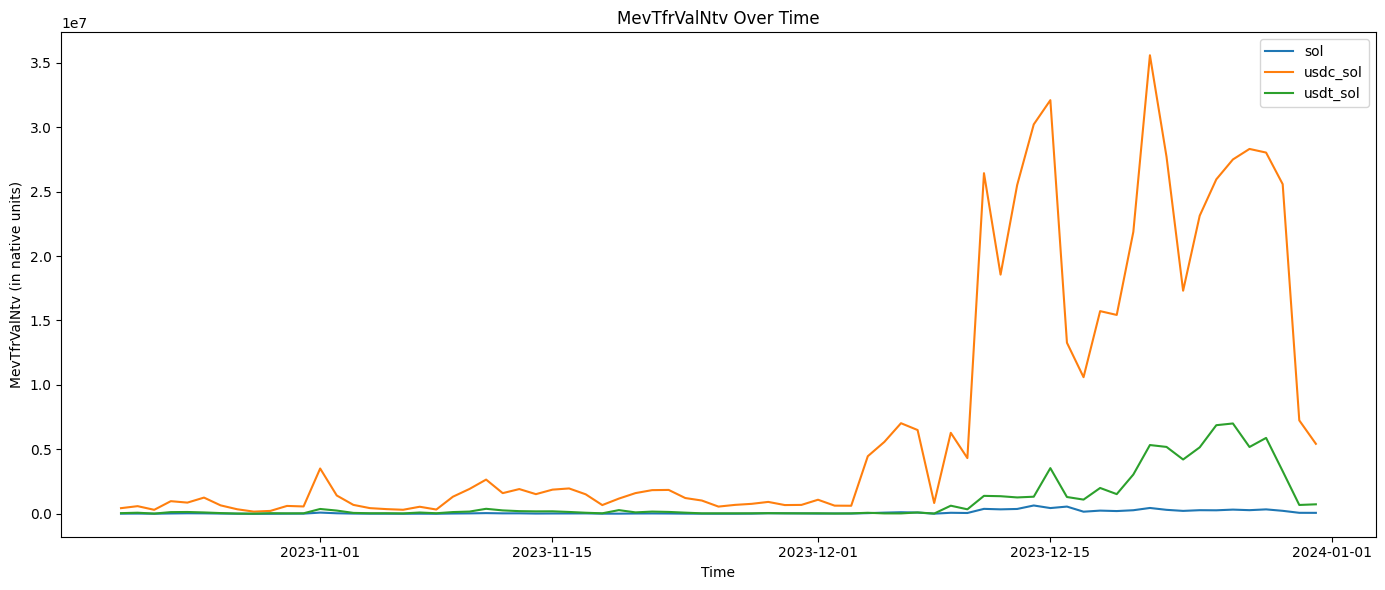

In [39]:
# Create the plot
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
plt.plot(df_val['time'], df_val['sol'], label='sol')
plt.plot(df_val['time'], df_val['usdc_sol'], label='usdc_sol')
plt.plot(df_val['time'], df_val['usdt_sol'], label='usdt_sol')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('MevTfrValNtv (in native units)')
plt.title('MevTfrValNtv Over Time')
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()
